In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import util
import visual
import methods

In [2]:
export_data = pd.read_csv('data/filtered.csv', index_col=0)
gdp_data = pd.read_csv('data/country_data.csv')

G = util.build_graph(export_data, gdp_data)

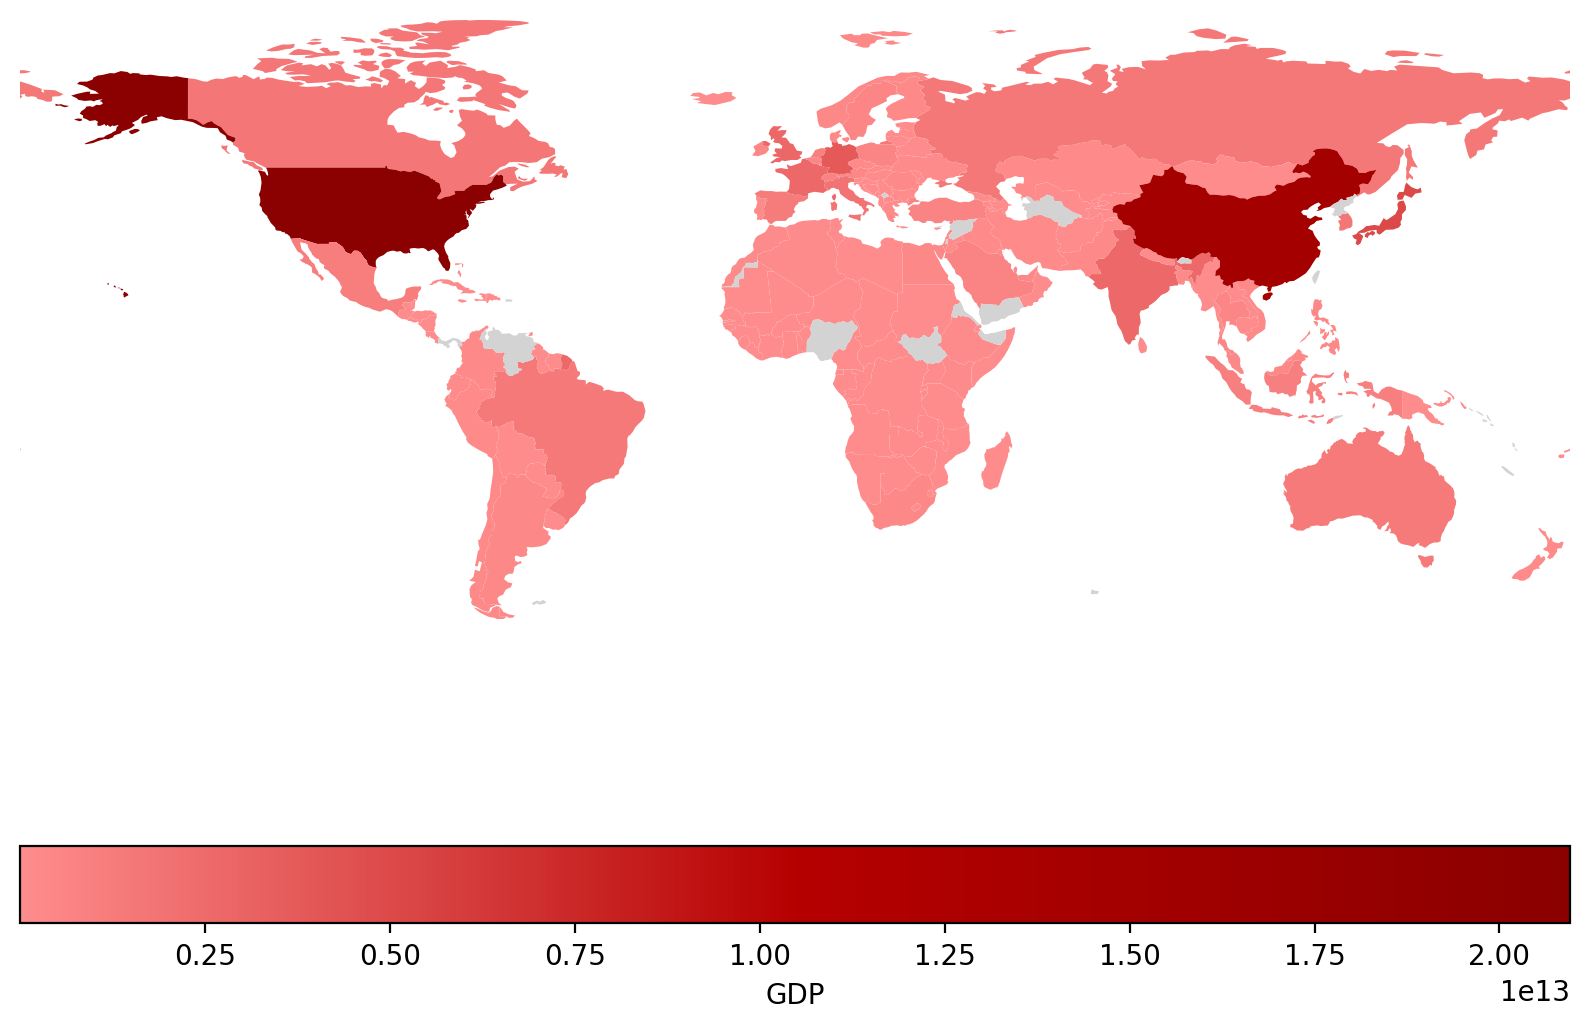

In [3]:
gdp = dict(zip(gdp_data['Country Name'].values, gdp_data['GDP'].values))
visual.geoplot_numbers(gdp, 'GDP', colors_red=True)

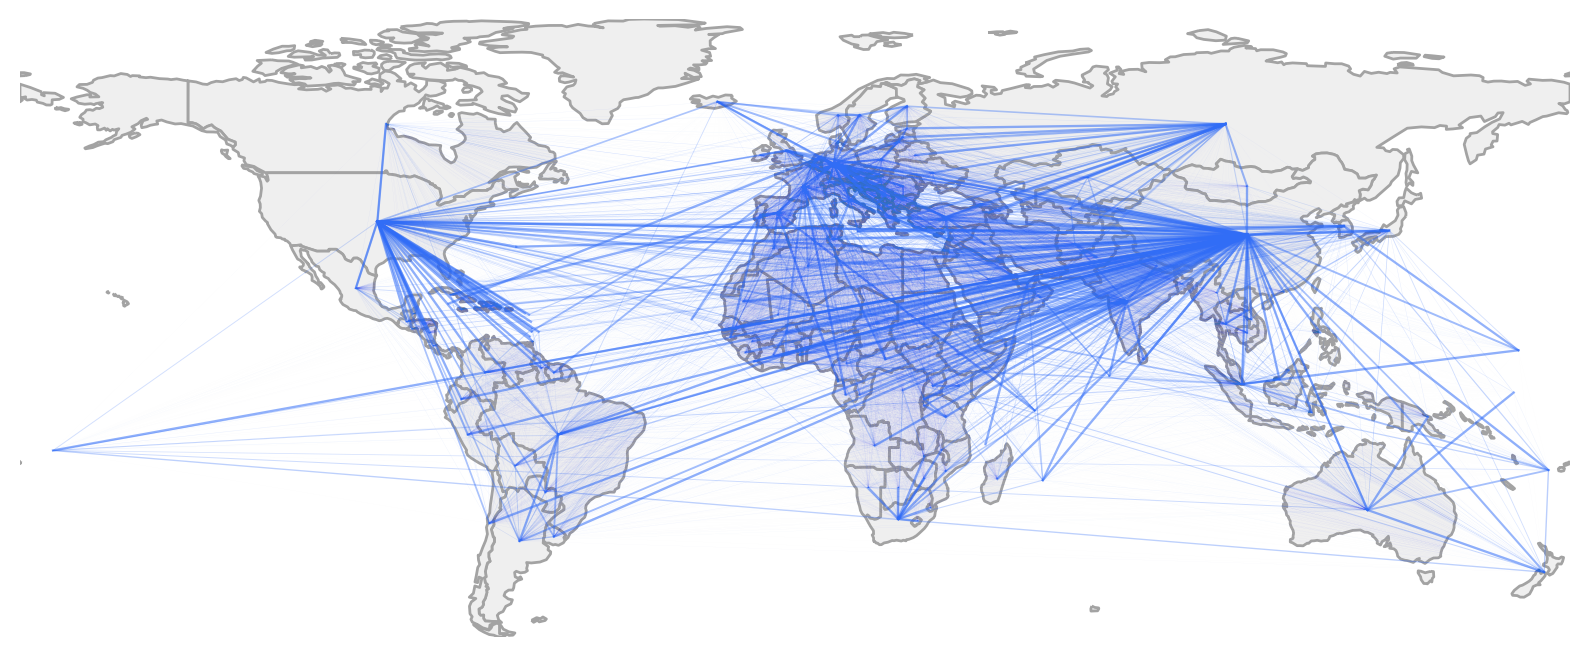

In [4]:
intersect = list(set(export_data.columns.values) & set(gdp_data['Country Name']))
cleaned_df = export_data[intersect].loc[intersect]

visual.geoplot_network(cleaned_df, gdp_data)

In [3]:
# add new attribute distance to all edges
for i, j, attributes in G.edges(data=True):
    attributes['distance'] = 1 / attributes['weight']

In [4]:
methods.calc_basic_metrics(G)

Nr. of nodes:  175
Nr. of edges:  18669
Average degree:  106.68
Density:  0.6131034482758622


(175, 18669, 106.68, 0.6131034482758622)

In [7]:
methods.is_weakly_conn(G)

True

In [6]:
clust_coeff, _ = methods.clustering_coef(G)

Average clustering coeficient:  0.00021213264442610858


0.00242 Libya, state of
0.00102 Marshall Islands
0.00081 Macedonia, north
0.00074 Viet Nam
0.00073 Germany
0.00067 China
0.00065 United States of America
0.00060 Netherlands
0.00057 United arab emirates
0.00053 Belgium


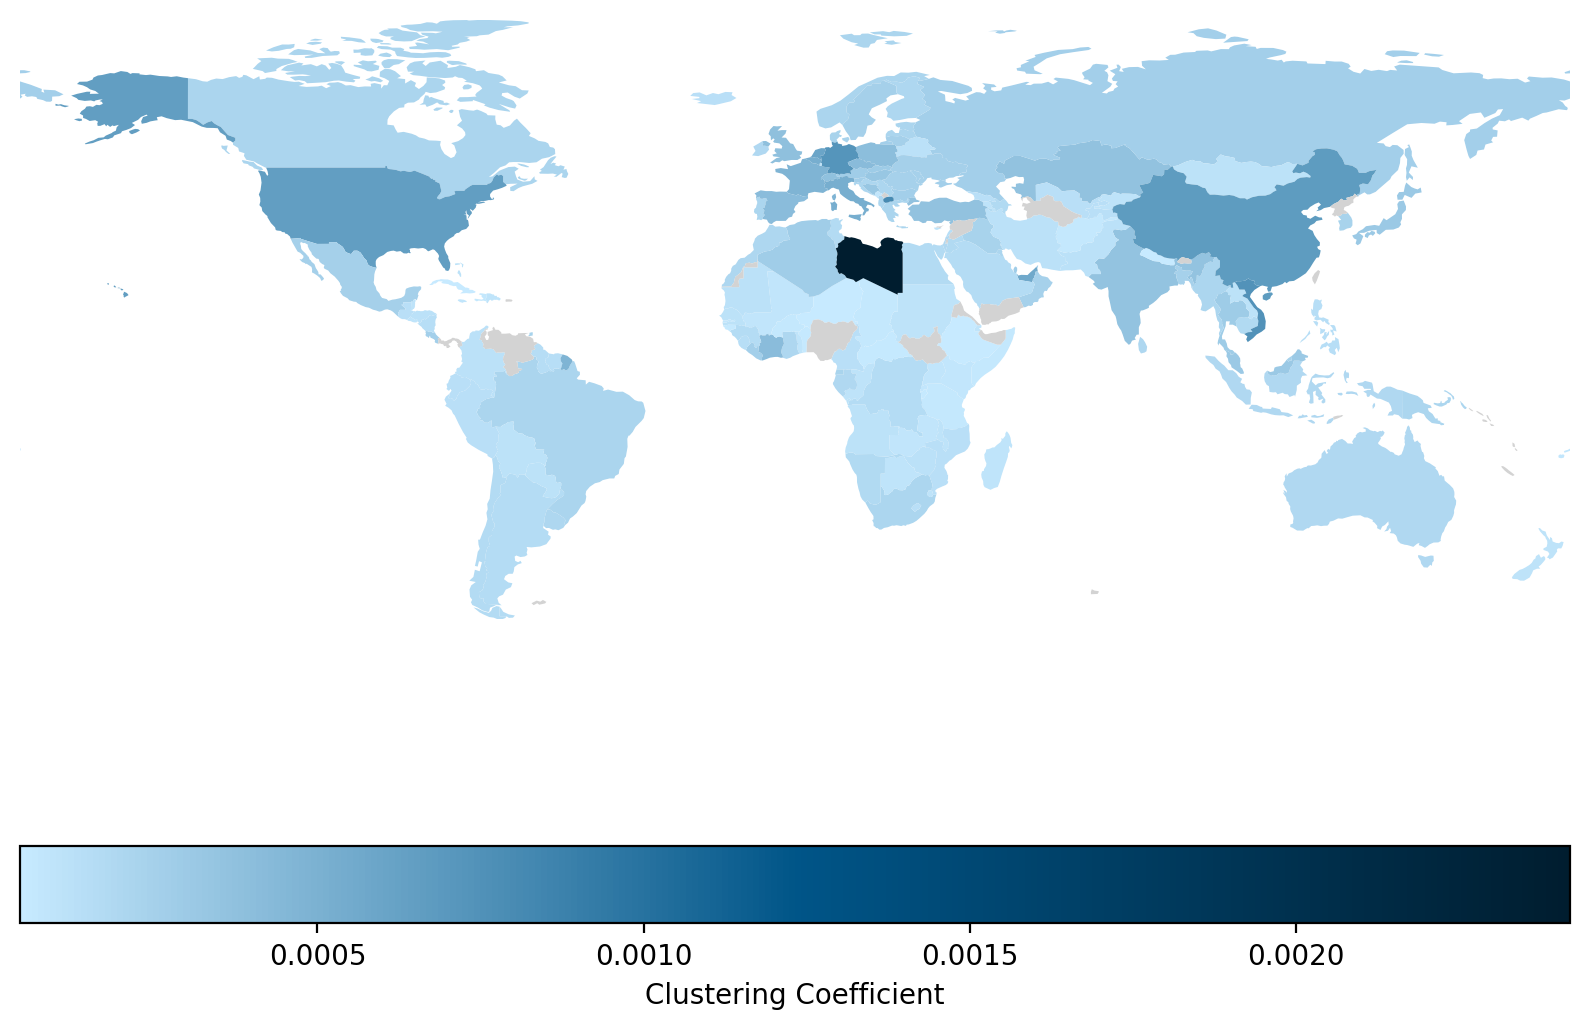

In [7]:
util.print_dict(clust_coeff)
visual.geoplot_numbers(clust_coeff, 'Clustering Coefficient')

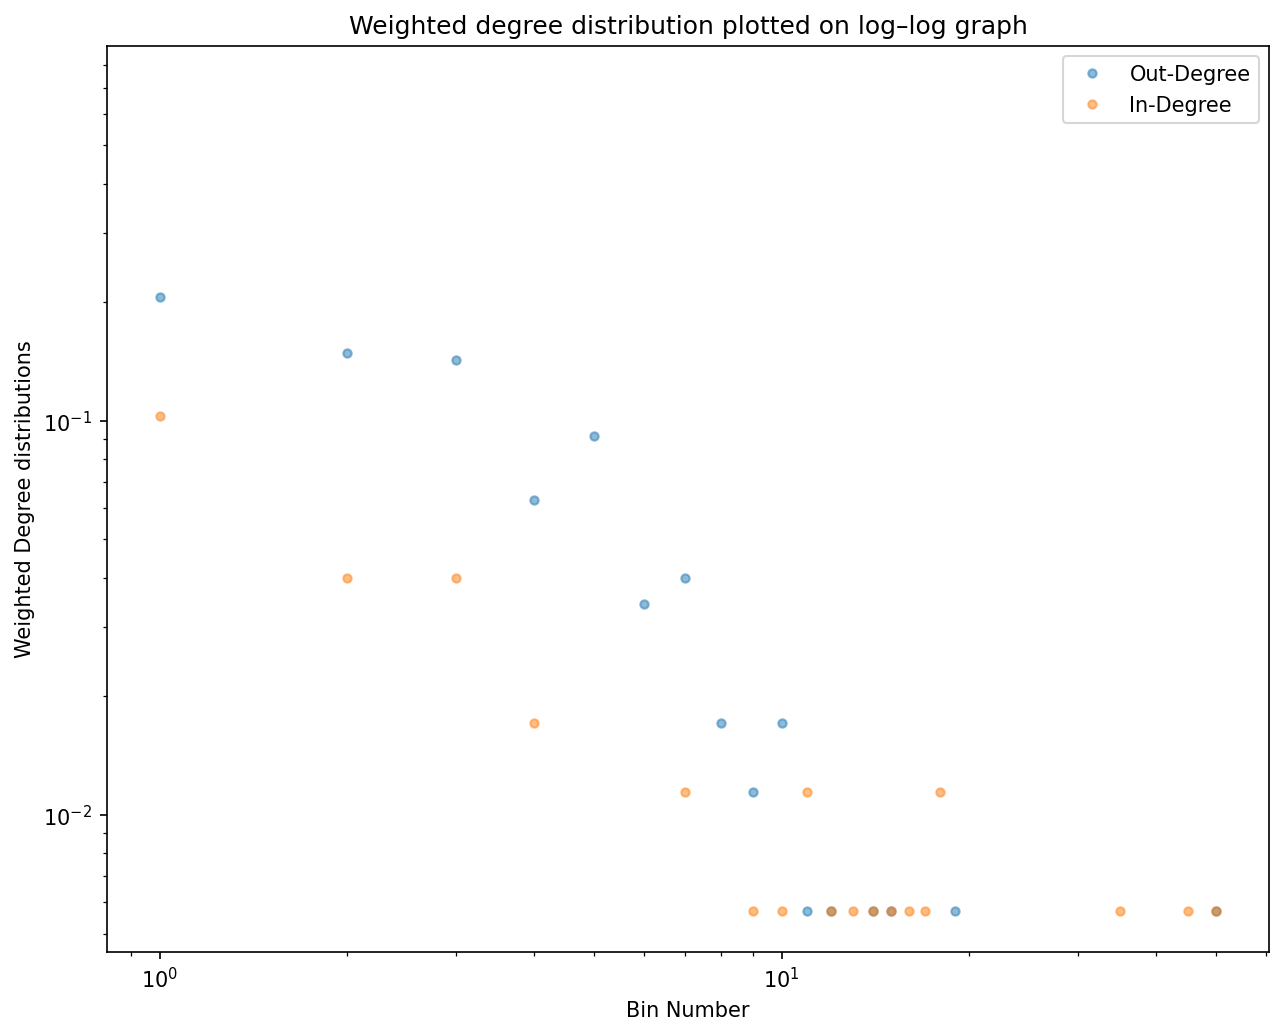

In [3]:
methods.show_deg_distr(G, 50)

In [11]:
betw, clos, in_deg, out_deg = methods.weighted_centr_measures(G)

0.24181 Germany
0.23490 Netherlands
0.19670 Singapore
0.16471 Viet Nam
0.14205 Switzerland
0.12049 China
0.10335 Belgium
0.09455 Malaysia
0.08631 Spain
0.08408 Poland


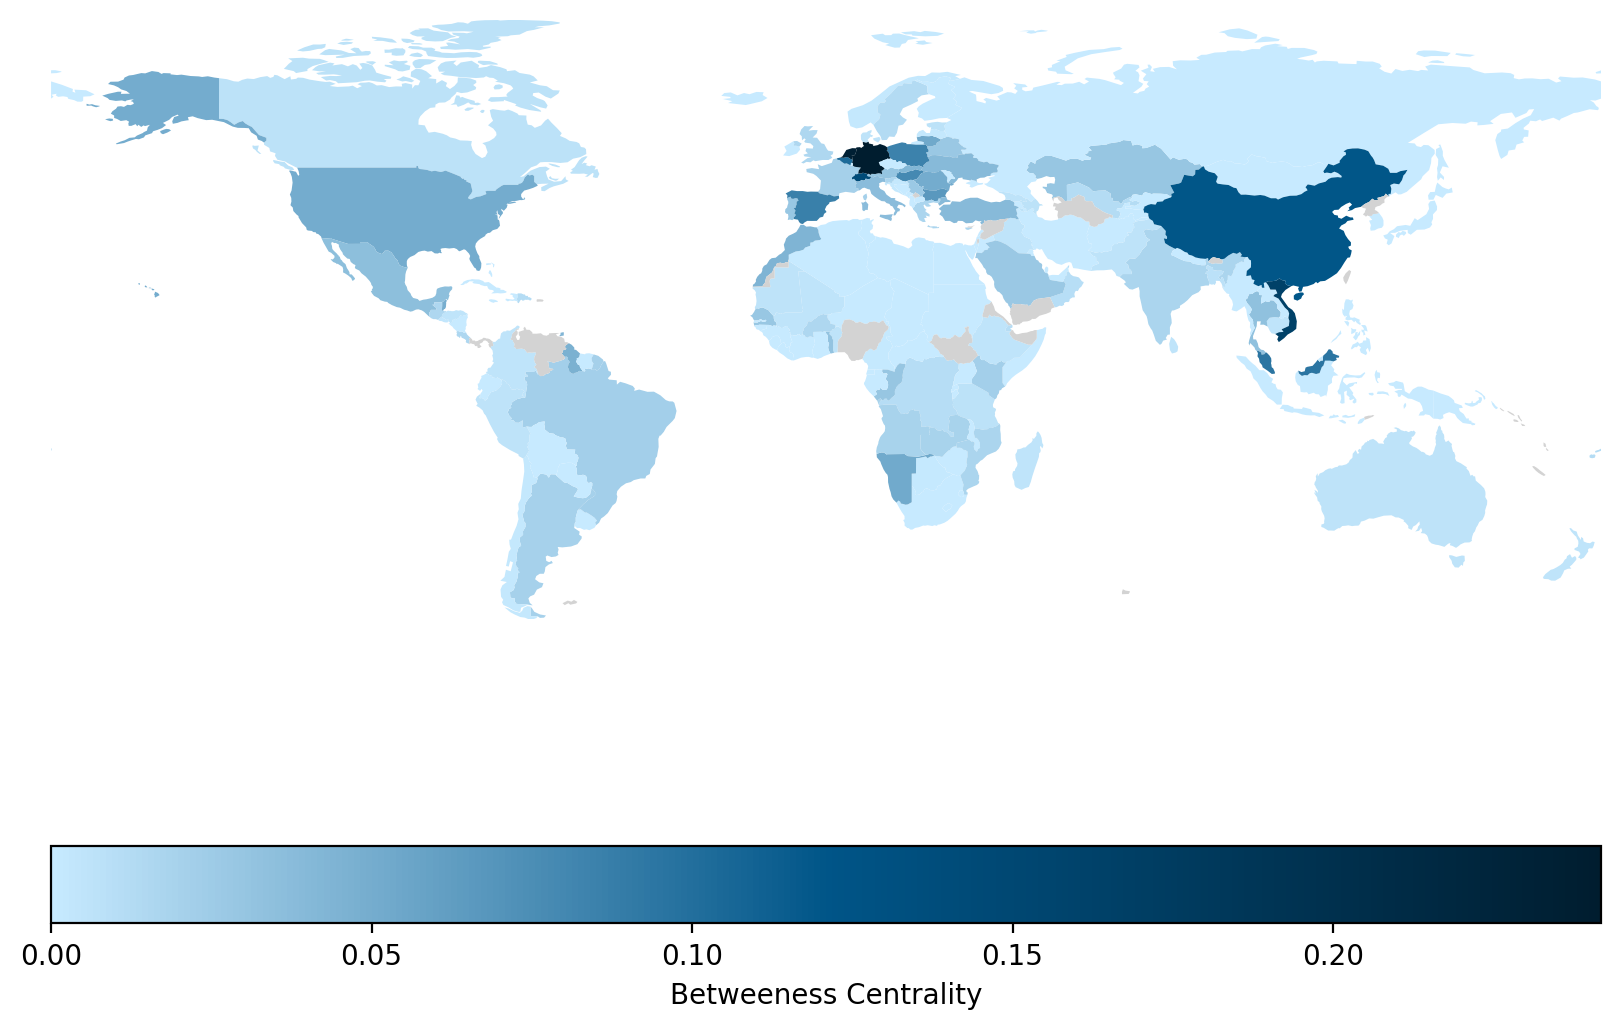

In [12]:
util.print_dict(betw)
visual.geoplot_numbers(betw, 'Betweeness Centrality')

0.01919 United States of America
0.01476 China
0.01070 Germany
0.00915 France
0.00891 India
0.00880 Netherlands
0.00852 Canada
0.00850 Italy
0.00843 United Kingdom
0.00809 Belgium


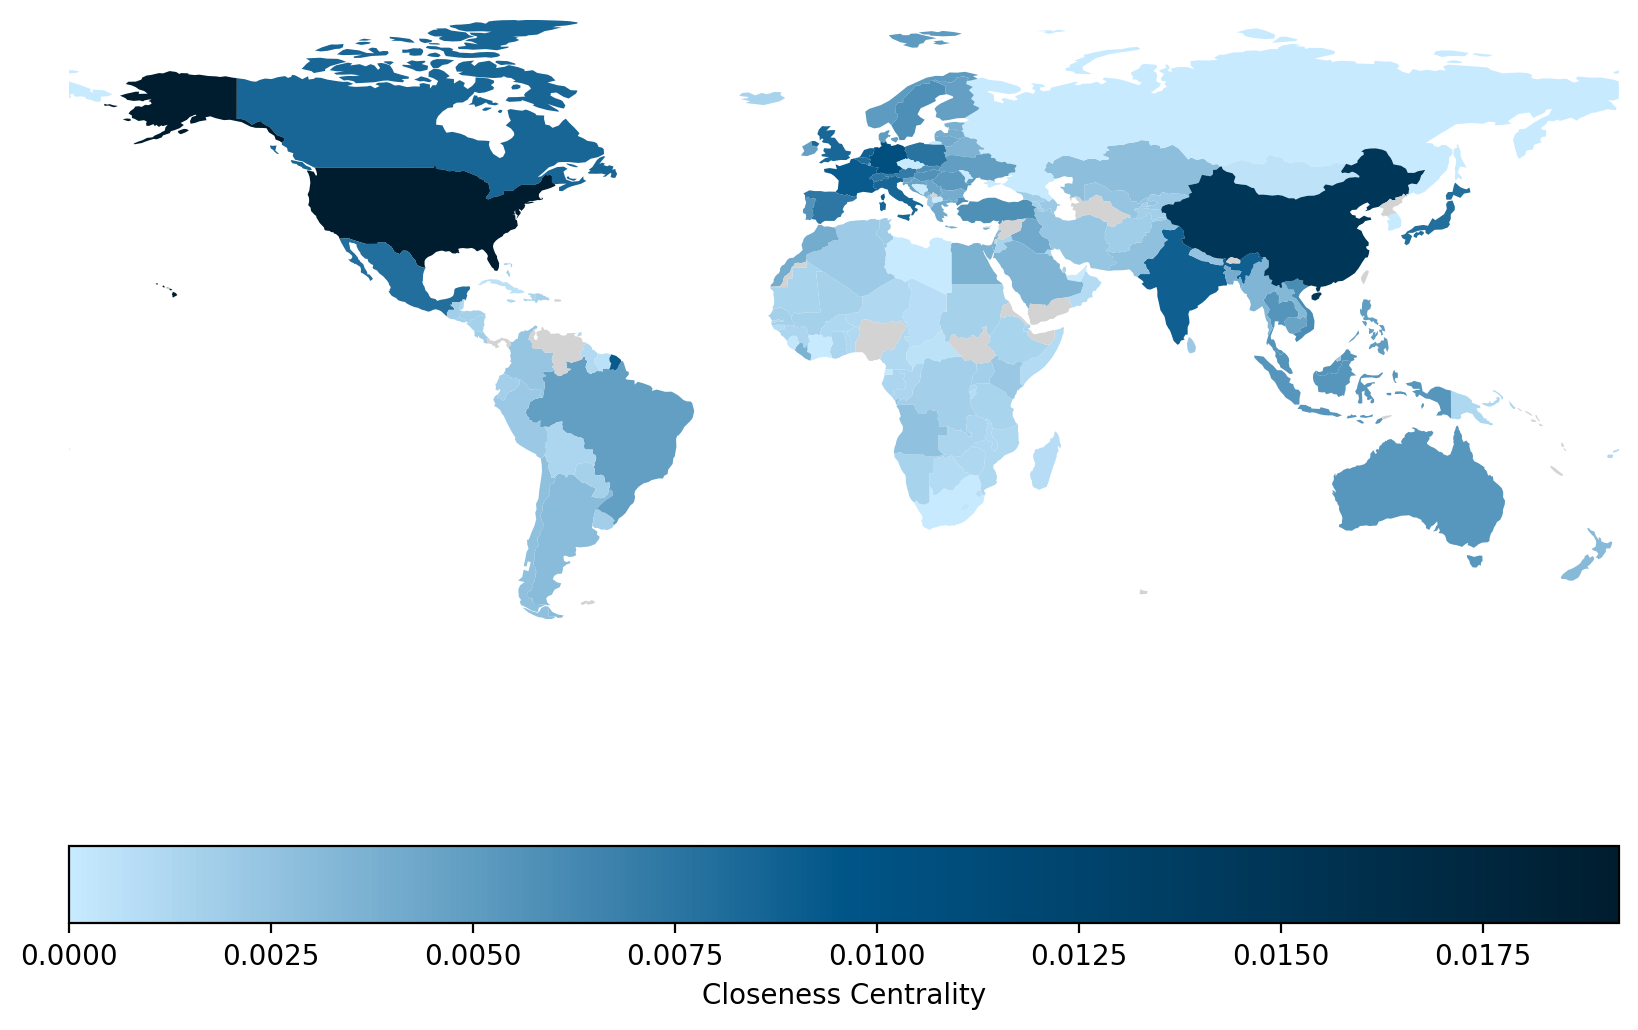

In [13]:
util.print_dict(clos)
visual.geoplot_numbers(clos, 'Closeness Centrality')

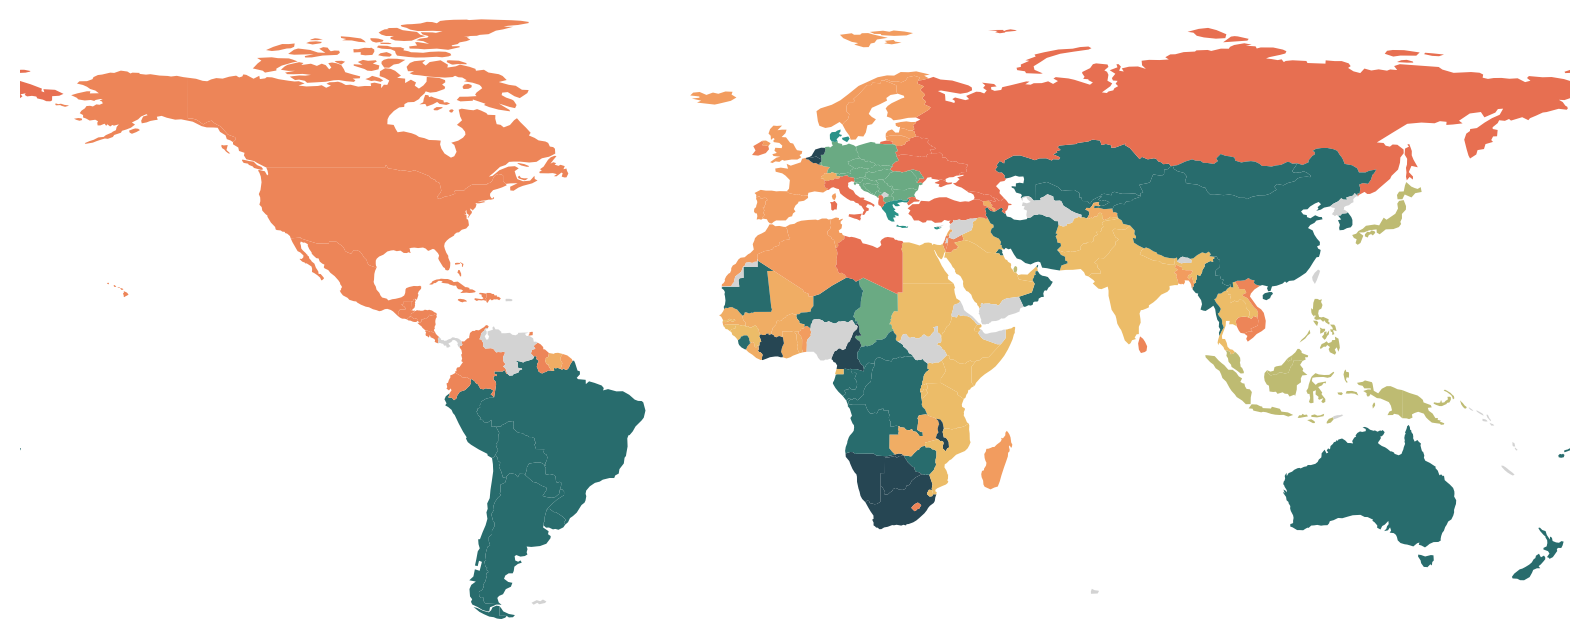

In [44]:
communities = methods.louvain_community(G)
visual.geoplot_groups(communities, 'louvain')